# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 14.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
187001,1.1084,0.3198,0.1855,0.0952,0.1074,0.1172,0.3467,0.2637,0.1270,0.2075,3,3,11,11
85436,0.2344,0.0098,0.0024,0.0024,0.0024,0.0024,0.0024,0.2271,0.0024,0.0024,0,0,0,0
303831,0.3589,0.1123,0.0073,0.0024,0.0024,0.0024,0.0269,0.2173,0.0024,0.0488,0,0,0,0
261862,0.5176,0.0708,0.0220,0.0049,0.0024,0.0146,0.0854,0.2222,0.0024,0.0879,0,0,0,0
172095,0.1025,0.0122,0.0806,0.0903,0.0171,0.0024,0.0366,0.0903,0.0024,0.0562,5,5,9,9


In [3]:
raw_data.shape

(461607, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461607 entries, 0 to 461606
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          461607 non-null  float64
 1   Emg2          461607 non-null  float64
 2   Emg3          461607 non-null  float64
 3   Emg4          461607 non-null  float64
 4   Emg5          461607 non-null  float64
 5   Emg6          461607 non-null  float64
 6   Emg7          461607 non-null  float64
 7   Emg8          461607 non-null  float64
 8   Emg9          461607 non-null  float64
 9   Emg10         461607 non-null  float64
 10  repetition    461607 non-null  int64  
 11  rerepetition  461607 non-null  int64  
 12  stimulus      461607 non-null  int64  
 13  restimulus    461607 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 49.3 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000
mean,0.562477,0.171519,0.099438,0.062419,0.029975,0.052018,0.200229,0.255614,0.076876,0.212711,3.195770,2.497919,5.663920,4.565063
std,0.579902,0.276268,0.182943,0.130411,0.059618,0.106883,0.360185,0.212620,0.184109,0.308897,3.486784,3.364923,6.588134,6.471103
min,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.117200,0.002400,0.002400,0.002400,0.002400,0.002400,0.019500,0.144000,0.002400,0.017100,0.000000,0.000000,0.000000,0.000000
50%,0.368700,0.065900,0.017100,0.002400,0.002400,0.007300,0.075700,0.217300,0.002400,0.090300,2.000000,0.000000,3.000000,0.000000
75%,0.849600,0.229500,0.122100,0.061000,0.029300,0.063500,0.231900,0.280800,0.073200,0.285600,6.000000,5.000000,10.000000,9.000000
max,4.668000,3.747600,2.961400,2.023900,0.808100,2.138700,4.663100,3.269000,3.242200,4.602100,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     193393
2      15514
12     15509
8      15507
7      15504
4      15501
5      15476
9      15465
6      15462
11     15461
3      15452
1      15435
10     15432
17     10343
13     10342
14     10337
15     10300
16     10263
19      5171
21      5163
18      5161
20      5147
22      5138
23      5131
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

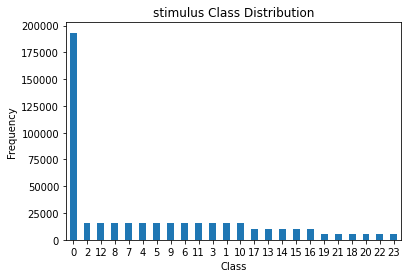

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
221716,0.0854,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0732,0.0024,0.0024,0,0,0,0
3828,1.6406,0.8545,0.9033,0.3027,0.1440,0.1709,0.7422,0.2930,0.2905,0.7739,5,5,1,1
116360,1.1255,0.4346,0.1904,0.1221,0.0269,0.0610,0.5493,0.3101,0.2319,0.5542,9,9,2,2
431918,0.4419,0.0635,0.1782,0.1929,0.0635,0.0806,0.2954,0.3613,0.1196,0.1563,2,2,21,21
435503,1.4160,0.2515,0.0830,0.0244,0.0488,0.1465,0.4785,0.4419,0.0269,0.4468,6,6,21,21


In [12]:
raw_data.shape

(390414, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390414 entries, 0 to 461606
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          390414 non-null  float64
 1   Emg2          390414 non-null  float64
 2   Emg3          390414 non-null  float64
 3   Emg4          390414 non-null  float64
 4   Emg5          390414 non-null  float64
 5   Emg6          390414 non-null  float64
 6   Emg7          390414 non-null  float64
 7   Emg8          390414 non-null  float64
 8   Emg9          390414 non-null  float64
 9   Emg10         390414 non-null  float64
 10  repetition    390414 non-null  int64  
 11  rerepetition  390414 non-null  int64  
 12  stimulus      390414 non-null  int64  
 13  restimulus    390414 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 44.7 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# Scalling Data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
X = StandardScaler().fit_transform(X)

# Indipendent Component Analysis (ICA)

https://www.nmr.mgh.harvard.edu/mne/0.14/manual/preprocessing/ica.html

In [18]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=10)
X_ica = ica.fit_transform(X)

In [19]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

In [20]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
y_pred1 = tree.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 80.00332979009515


Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92     37515
           1       0.82      0.80      0.81      2235
           2       0.67      0.69      0.68      2340
           3       0.71      0.71      0.71      2154
           4       0.69      0.71      0.70      2186
           5       0.68      0.70      0.69      2062
           6       0.72      0.71      0.71      2329
           7       0.67      0.66      0.66      2264
           8       0.64      0.63      0.64      2354
           9       0.65      0.64      0.65      2352
          10       0.67      0.65      0.66      2117
          11       0.66      0.67      0.67      2378
          12       0.67      0.66      0.67      2567
          13       0.69      0.69      0.69      1473
          14       0.67      0.66      0.67      1438
          15       0.65      0.68      0.67      1529
          16       0.71      0.71      0.71      1614
 

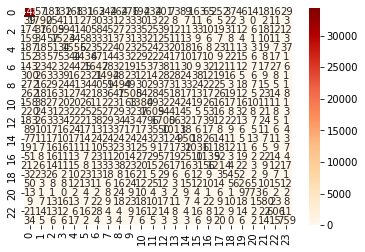

In [23]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [24]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 1.5083692993353226
MSE: 16.5826108115723
RMSE: 4.072175194115831


In [25]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.800059076142628
Recall Score :  0.8000332979009516
f1_score :  0.8000118079140484


# KNeighborsClassifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 91.9162941997618


Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     37515
           1       0.95      0.95      0.95      2235
           2       0.90      0.87      0.88      2340
           3       0.93      0.86      0.89      2154
           4       0.91      0.88      0.90      2186
           5       0.90      0.85      0.88      2062
           6       0.90      0.88      0.89      2329
           7       0.89      0.82      0.85      2264
           8       0.89      0.81      0.85      2354
           9       0.90      0.82      0.86      2352
          10       0.92      0.81      0.86      2117
          11       0.89      0.82      0.86      2378
          12       0.91      0.82      0.87      2567
          13       0.91      0.88      0.90      1473
          14       0.89      0.83      0.86      1438
          15       0.88      0.82      0.85      1529
          16       0.91      0.86      0.89      1614
 

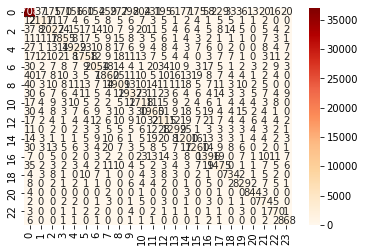

In [29]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [30]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 0.6258468552693929
MSE: 6.937361525556139
RMSE: 2.6338871512568907


In [31]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.9187861195654174
Recall Score :  0.9191629419976179
f1_score :  0.9178142045590636


# ExtraTreesClassifier

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier()
extratree.fit(X_train, y_train)

ExtraTreesClassifier()

In [33]:
y_pred5 = extratree.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 93.40573492309466


Classification report : 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     37515
           1       0.98      0.95      0.97      2235
           2       0.95      0.88      0.91      2340
           3       0.96      0.88      0.92      2154
           4       0.97      0.88      0.92      2186
           5       0.97      0.87      0.92      2062
           6       0.97      0.88      0.92      2329
           7       0.96      0.82      0.88      2264
           8       0.95      0.83      0.89      2354
           9       0.95      0.82      0.88      2352
          10       0.96      0.85      0.90      2117
          11       0.96      0.84      0.90      2378
          12       0.96      0.86      0.91      2567
          13       0.97      0.92      0.94      1473
          14       0.95      0.88      0.91      1438
          15       0.94      0.85      0.89      1529
          16       0.96      0.91      0.93      1614
 

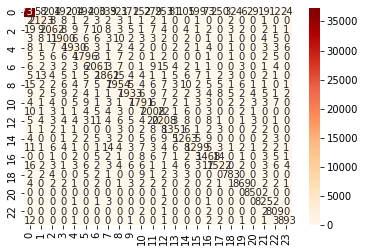

In [35]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [36]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.5590461432065879
MSE: 6.415557803875363
RMSE: 2.5328951426925204


In [37]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.9363595031743509
Recall Score :  0.9340573492309465
f1_score :  0.9330679662896477


# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 92.19932635784997


Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     37515
           1       0.97      0.93      0.95      2235
           2       0.92      0.86      0.89      2340
           3       0.93      0.86      0.89      2154
           4       0.95      0.87      0.91      2186
           5       0.95      0.85      0.90      2062
           6       0.95      0.86      0.91      2329
           7       0.93      0.80      0.86      2264
           8       0.92      0.80      0.86      2354
           9       0.93      0.81      0.87      2352
          10       0.94      0.83      0.88      2117
          11       0.94      0.82      0.87      2378
          12       0.92      0.84      0.88      2567
          13       0.94      0.89      0.91      1473
          14       0.93      0.85      0.89      1438
          15       0.91      0.82      0.86      1529
          16       0.94      0.89      0.91      1614
 

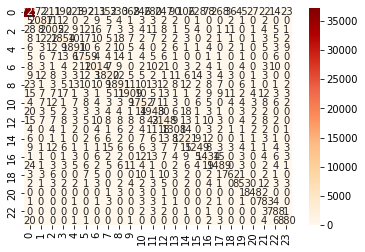

In [41]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [42]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.6364637629189452
MSE: 7.2527310682222765
RMSE: 2.69308950245295


In [43]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.923406908627815
Recall Score :  0.9219932635784998
f1_score :  0.9205462378650061


# XGBoost

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:44:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [45]:
y_pred4 = xgb.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 84.68040418529002


Classification report : 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     37515
           1       0.91      0.83      0.86      2235
           2       0.79      0.68      0.73      2340
           3       0.81      0.74      0.77      2154
           4       0.81      0.72      0.77      2186
           5       0.84      0.70      0.77      2062
           6       0.84      0.75      0.79      2329
           7       0.81      0.68      0.74      2264
           8       0.75      0.63      0.69      2354
           9       0.77      0.69      0.73      2352
          10       0.75      0.66      0.70      2117
          11       0.80      0.66      0.73      2378
          12       0.77      0.69      0.73      2567
          13       0.80      0.74      0.77      1473
          14       0.80      0.68      0.73      1438
          15       0.76      0.72      0.74      1529
          16       0.80      0.76      0.78      1614
 

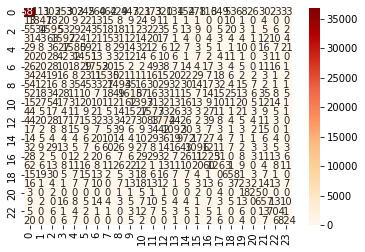

In [47]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [48]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 1.1478042595699447
MSE: 12.610888413611157
RMSE: 3.5511812701706957


In [49]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.8426066580666846
Recall Score :  0.8468040418529001
f1_score :  0.8417569878995409
